<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        PROJECT 7 - K-means
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Scientific Programming</b> <br>  <b>AY 2021/2022</b> <br>
    Emanuele Cavalleri<br>(matriculation number: <b>995883</b>)<br>
    <a href="mailto:emanuele.cavalleri@mail.polimi.it">emanuele.cavalleri@mail.polimi.it</a><br>
    <a href="https://github.com/emanuelecavalleri/K-means">GitHub link for this project</a><br>
    </div>
</tr>
</table>

**Short description**: kmeans is one of the most popular clustering algorithms for vectors. Starting from a number of clusters, generates a random clustering of the objects: then applies iteratively two steps, namely assignment and update until convergence, to identify a proper clustering.

**Expected outcome**: Implement a python script that:
1. Takes as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>
2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)
3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)
4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

<img src="https://miro.medium.com/max/1200/1*TmvsQ4XaOxeb-TmKk1qgOw.png" alt=""> 

# Dependencies

In [1]:
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from collections import defaultdict
from math import sqrt
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

1. Take as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>

In [7]:
k = 5 # Number of clusters

# 10,000 samples/rows, 3 dimensions, 5 "real" clusters
data = make_blobs(n_samples=10000, n_features=3, centers=5)

print(data[0])
print('\n')
# Save onto a CSV
np.savetxt("data.csv", data[0], delimiter=",")

# data[1] is an array of labels which we'll use later to compare our clusters with the "real" ones
print(data[1])

# Simulating CSV user's input
df = pd.read_csv('data.csv', sep = ',', header=None, names=["x","y","z"])
df

[[ 7.95942284 -6.32249961  1.06528967]
 [ 7.21448253 -5.4247009  -2.33795385]
 [ 7.49358168 -5.61997221 -2.77292513]
 ...
 [ 6.62283662 -7.3452389   0.67914988]
 [ 2.29207919 -1.90908793 -4.54081277]
 [ 6.95510935 -6.57484532  0.62517585]]


[3 2 2 ... 3 1 2]


,x,y,z
0,7.959423,-6.322500,1.065290
1,7.214483,-5.424701,-2.337954
2,7.493582,-5.619972,-2.772925
3,-0.640174,7.668739,2.558633
4,-1.324572,5.442823,-0.482119
...,...,...,...
9995,-6.046819,2.748934,-6.685580
9996,-1.790540,6.582878,3.892785
9997,6.622837,-7.345239,0.679150
9998,2.292079,-1.909088,-4.540813


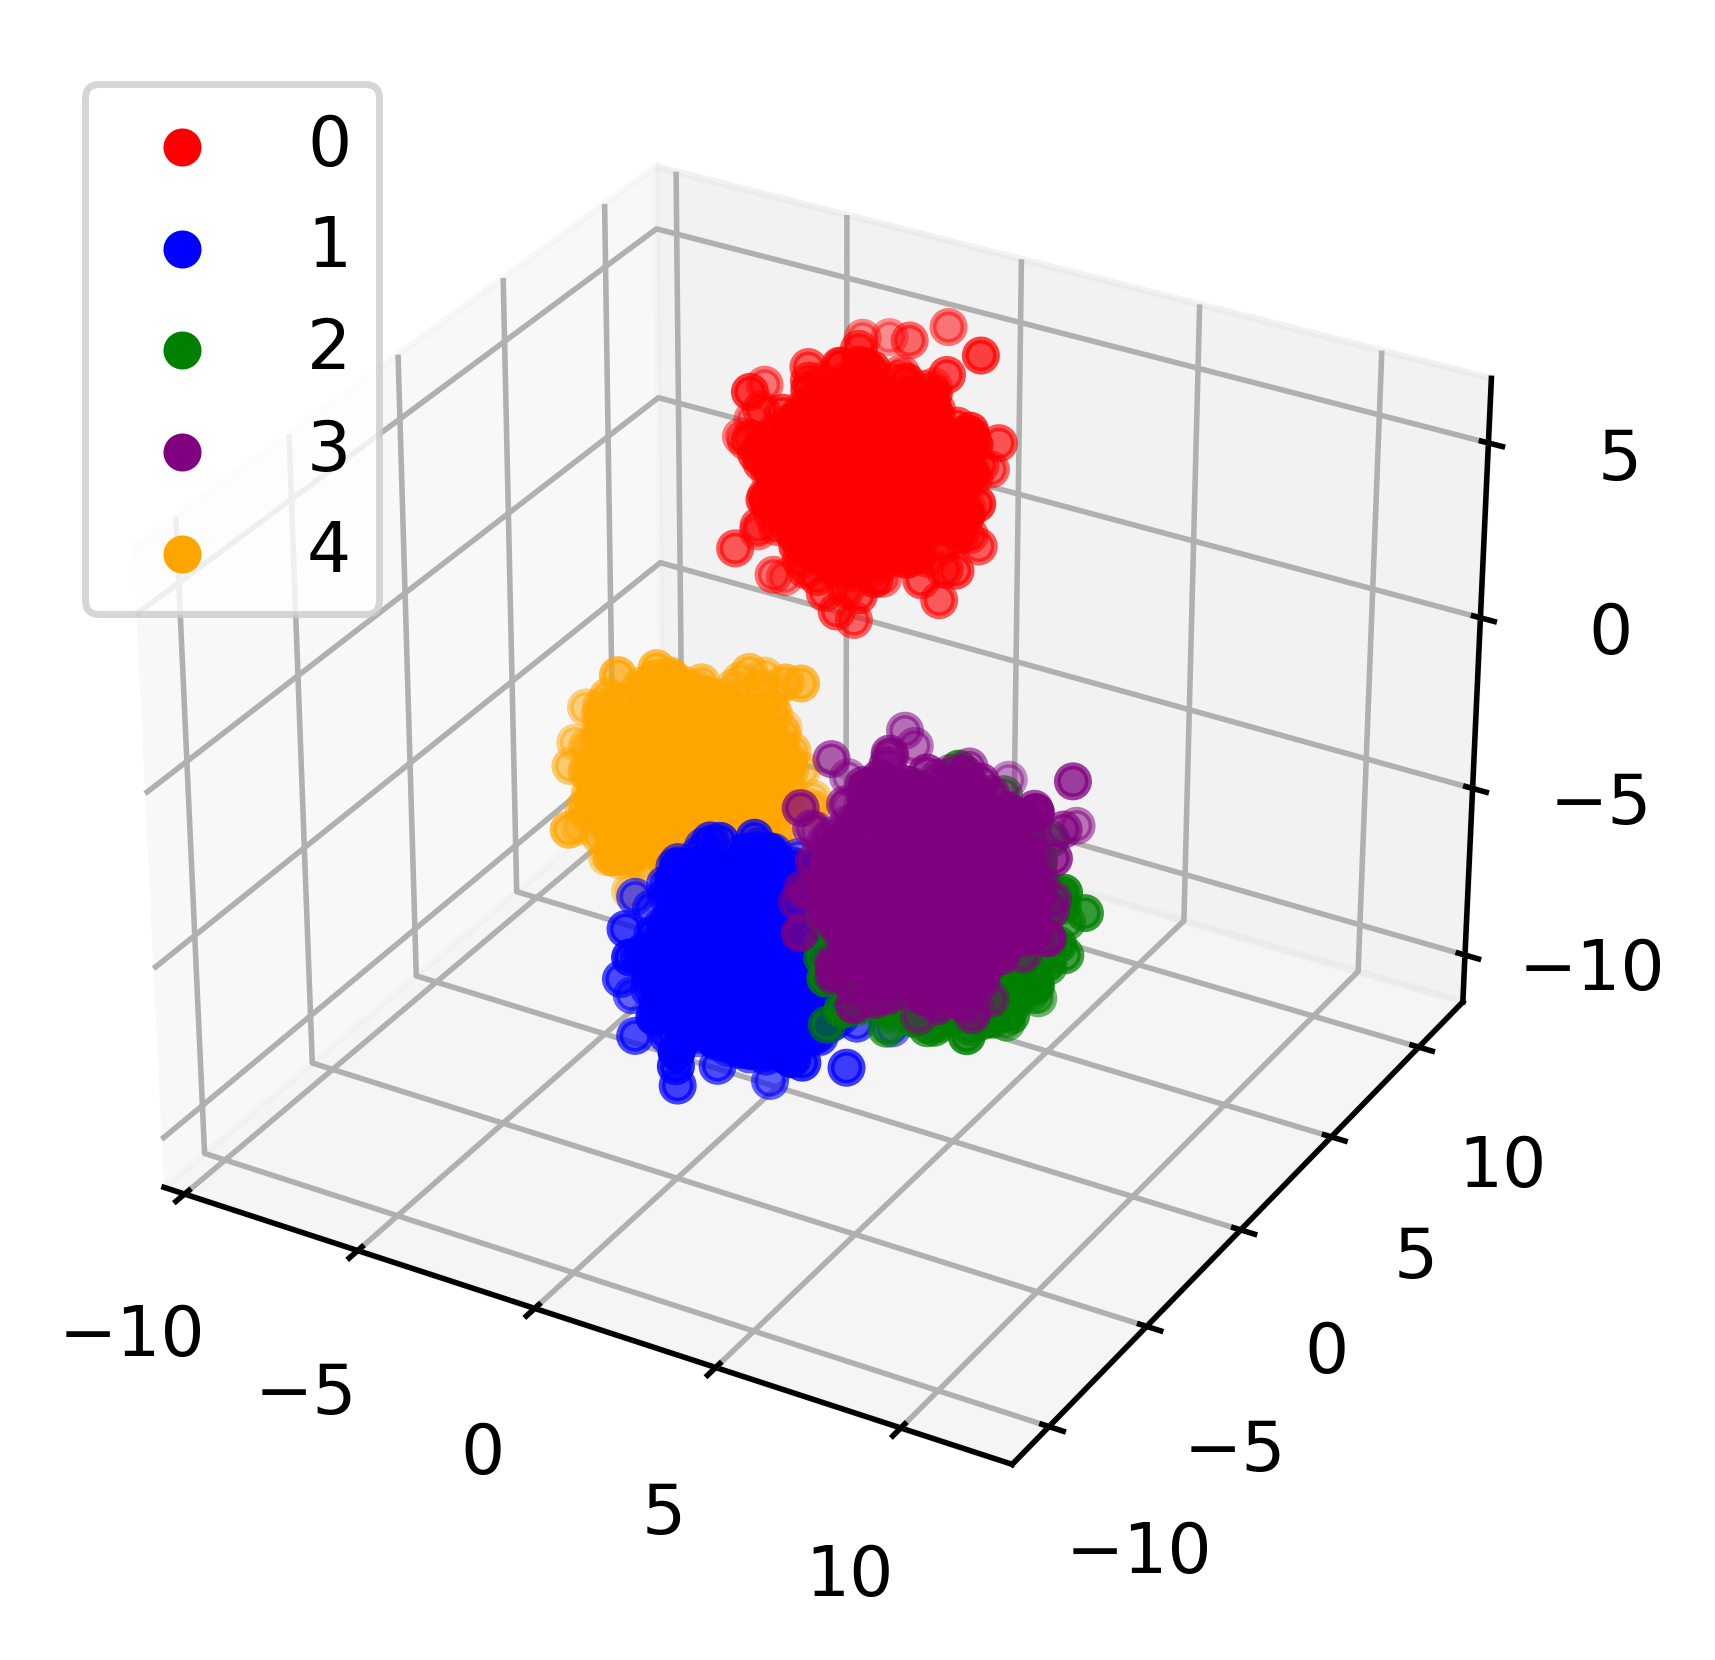

In [10]:
# Visualizing the dataset using the "real" clustering
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')

for i in range(k):
    dt=df[data[1]==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)

In [11]:
data0=data[0].tolist()

In [25]:
def square(list):
    return map(lambda x: x ** 2, list)

# Euclidean distance of 2 lists
def dist_list(ls1,ls2):
    diff=[a - b for a, b in zip(ls1, ls2)]
    return sqrt(sum(square(diff)))

# Euclidean distance of 2 numpy arrays
def dist_np(pt1,pt2):
    return np.sqrt(((pt1-pt2)**2).sum())

def list_kmeans(k,data,itr,thres):
    # Choosing k random datapoints to initialize the means
    means=sample(data, k)
    count=0
    compare=[]
    
    # Outer while loop to control the number of iterations using count
    while count<itr:
        count+=1
        
        # Initializing hash table to assign the cluster to each data point
        mean_dict=defaultdict(list)
        for point in data:
            tmp=None
            mindist=float('inf')
            
            for mean in means:
                # Finding the distance between the point under consideration 
                # and the centroids of previously formed clusters
                d=dist_list(mean,point)
                
                if d<mindist:
                    # Capturing the closest centroid for the given point 
                    mindist=d
                    tmp=mean
                    
            # Assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[]
        for mean in mean_dict:
            # Optimizing the centroids by taking the mean of all the points
            # in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # Checking for convergence of centroid for early stopping
        if len(compare)>1 and dist_np(compare[-1],compare[-2])<thres:
            print(f'The algorithm converged in {count} iterations')
            return means
    return means

In [26]:
mu=list_kmeans(5,data0,1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')

The algorithm converged in 36 iterations

The centroids of k-clusters are [[7.951430489930429, -6.4910638473975375, -0.13644494508443128], [-1.7120476572450596, 7.615722510143109, 2.319355683524679], [-5.738075645793514, 5.485513736832296, -6.828964937562175], [1.375721960229222, -3.822323625934726, -5.889033685985841], [1.6719004958148007, -3.712101742529669, -4.282266706556792]]


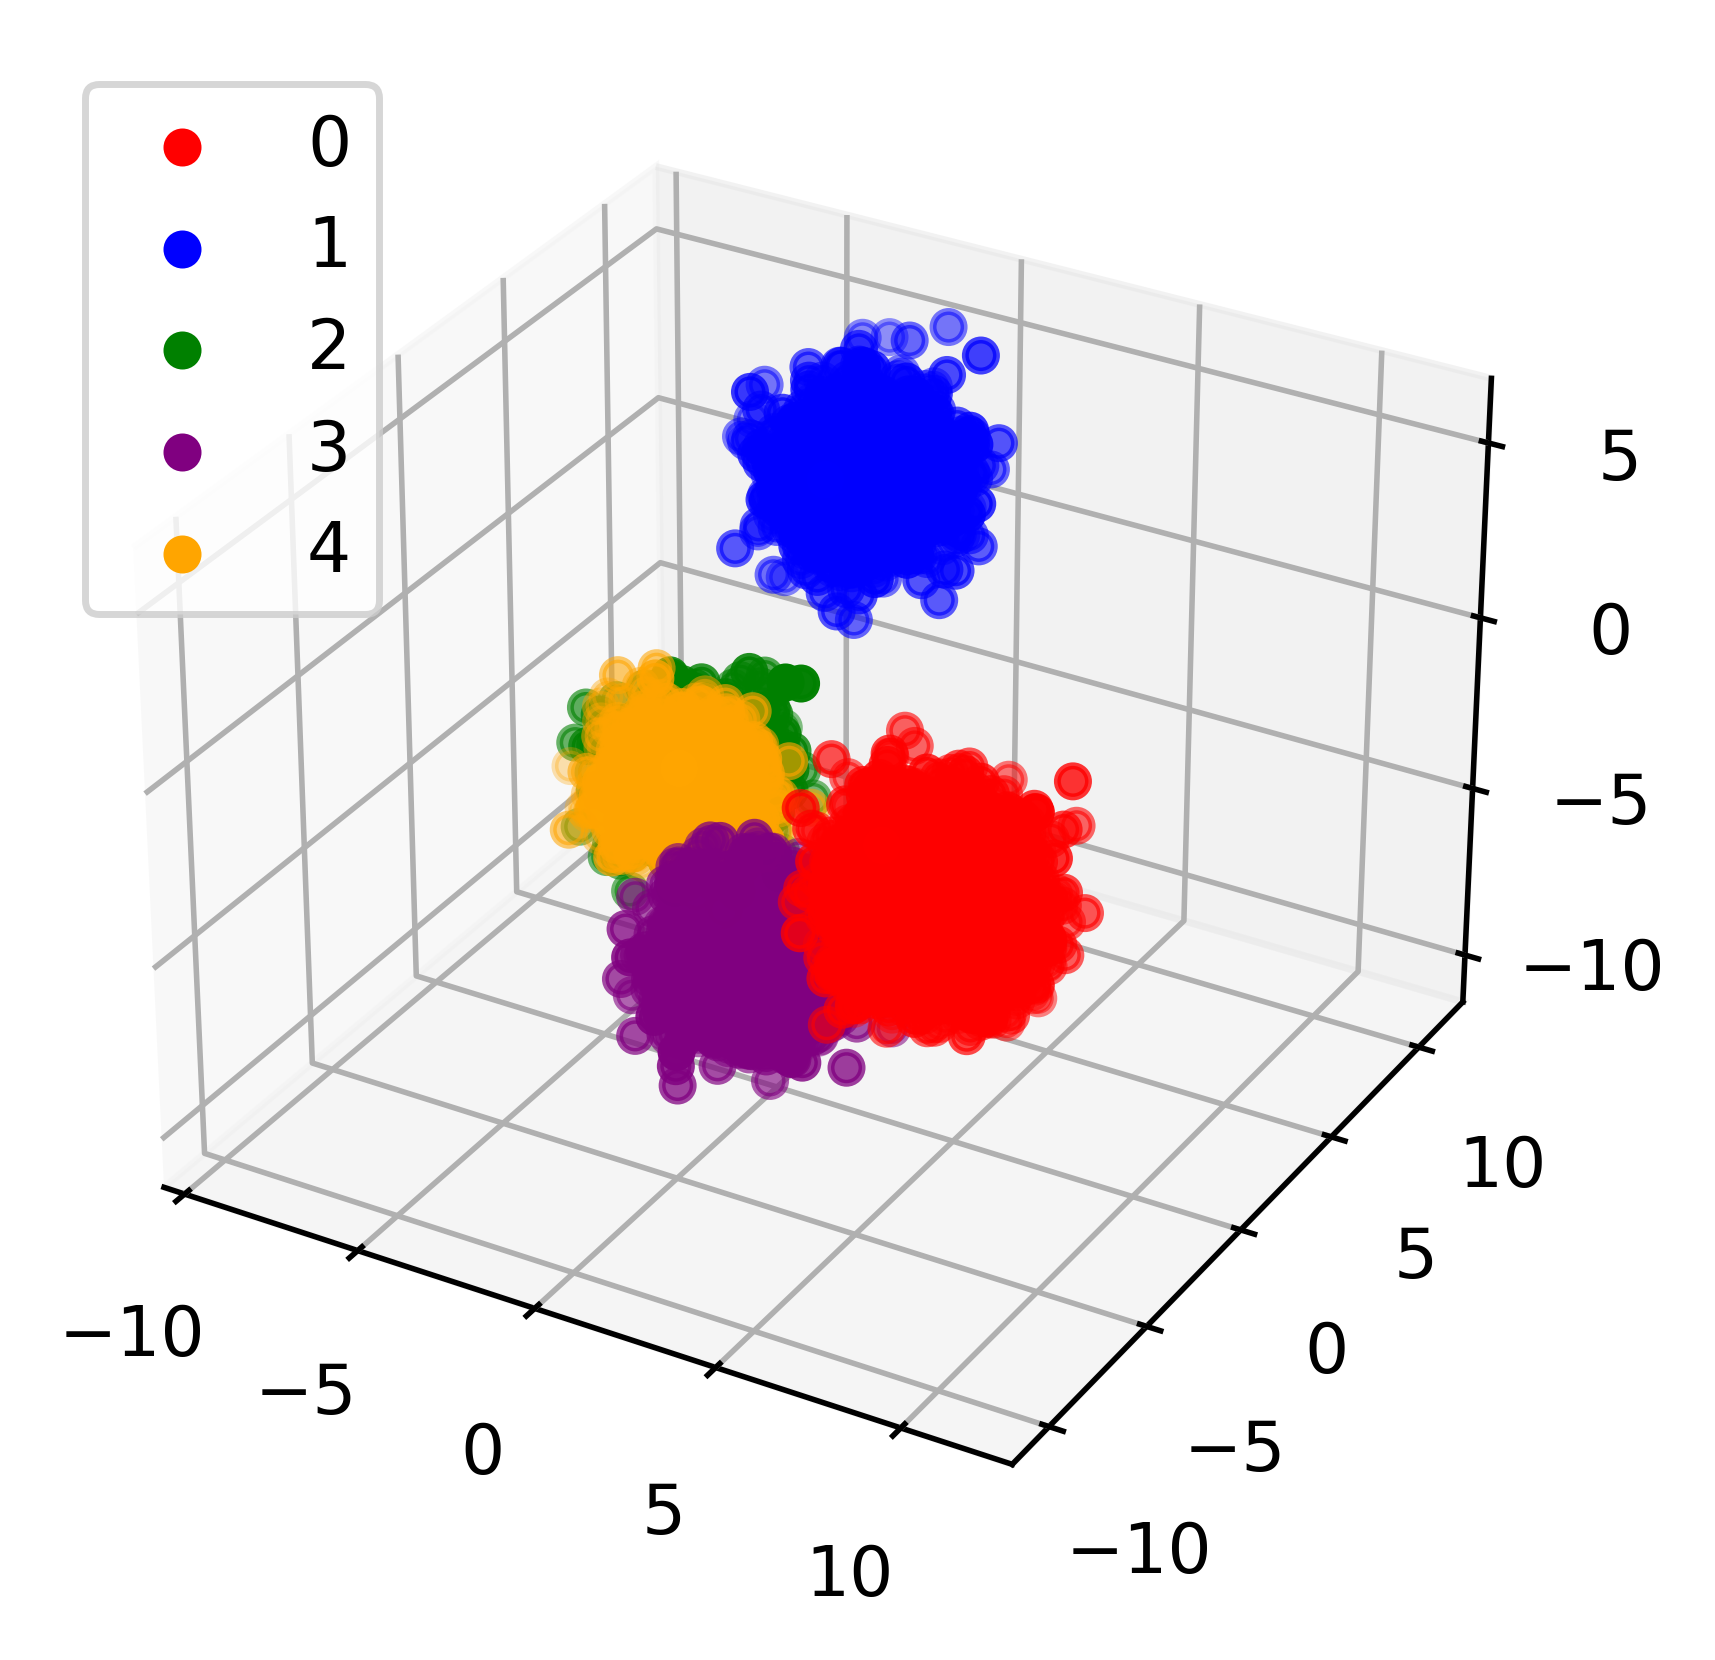

In [19]:
def coloring(point1,point2,point3):
    mindist=float('inf')
    ans=None
    point=[point1,point2,point3]
    for i,pt in enumerate(mu):
        if dist_np(pt,point)<mindist:
            mindist=dist_np(pt,point)
            ans=i
    return ans

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z),axis=1)

mu=np.array(mu)

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)

In [20]:
def npkmeans(k,data,itr,thres):   
    # Choosing k random datapoints to initialize the means
    means=data[np.random.choice(data.shape[0], k, replace=False)]
    count=0
    compare=[]
    
    # Outer while loop to control the number of iterations using count
    while count<itr:
        count+=1
        
        # Initializing hash table to assign the cluster to each data point
        mean_dict=defaultdict(list)
        for point in data:
            tmp=None
            mindist=float('inf')
            
            for mean in means:
                # Finding the distance between the point under consideration 
                # and the centroids of previously formed clusters
                d=dist_np(mean,point)
                
                if d<mindist:
                    # Capturing the closest centroid for the given point 
                    mindist=d
                    tmp=mean
                    
            # Assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[]
        for mean in mean_dict:
            # Optimizing the centroids by taking the mean of all the points
            # in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # Checking for convergence of centroid for early stopping
        if len(compare)>1 and dist_np(compare[-1],compare[-2])<thres:
            print(f'The algorithm converged in {count} iterations')
            return means
    return means

In [21]:
mu=npkmeans(5,data[0],1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')

The algorithm converged in 17 iterations

The centroids of k-clusters are [[7.951430489930429, -6.4910638473975375, -0.13644494508443128], [-1.0346742507442384, 7.162895635325967, 2.5494216689289826], [-5.738075645793514, 5.485513736832296, -6.828964937562175], [1.5207013533983622, -3.768370014007946, -5.1025212495553225], [-2.351240638500936, 8.043025615534225, 2.102257460174266]]


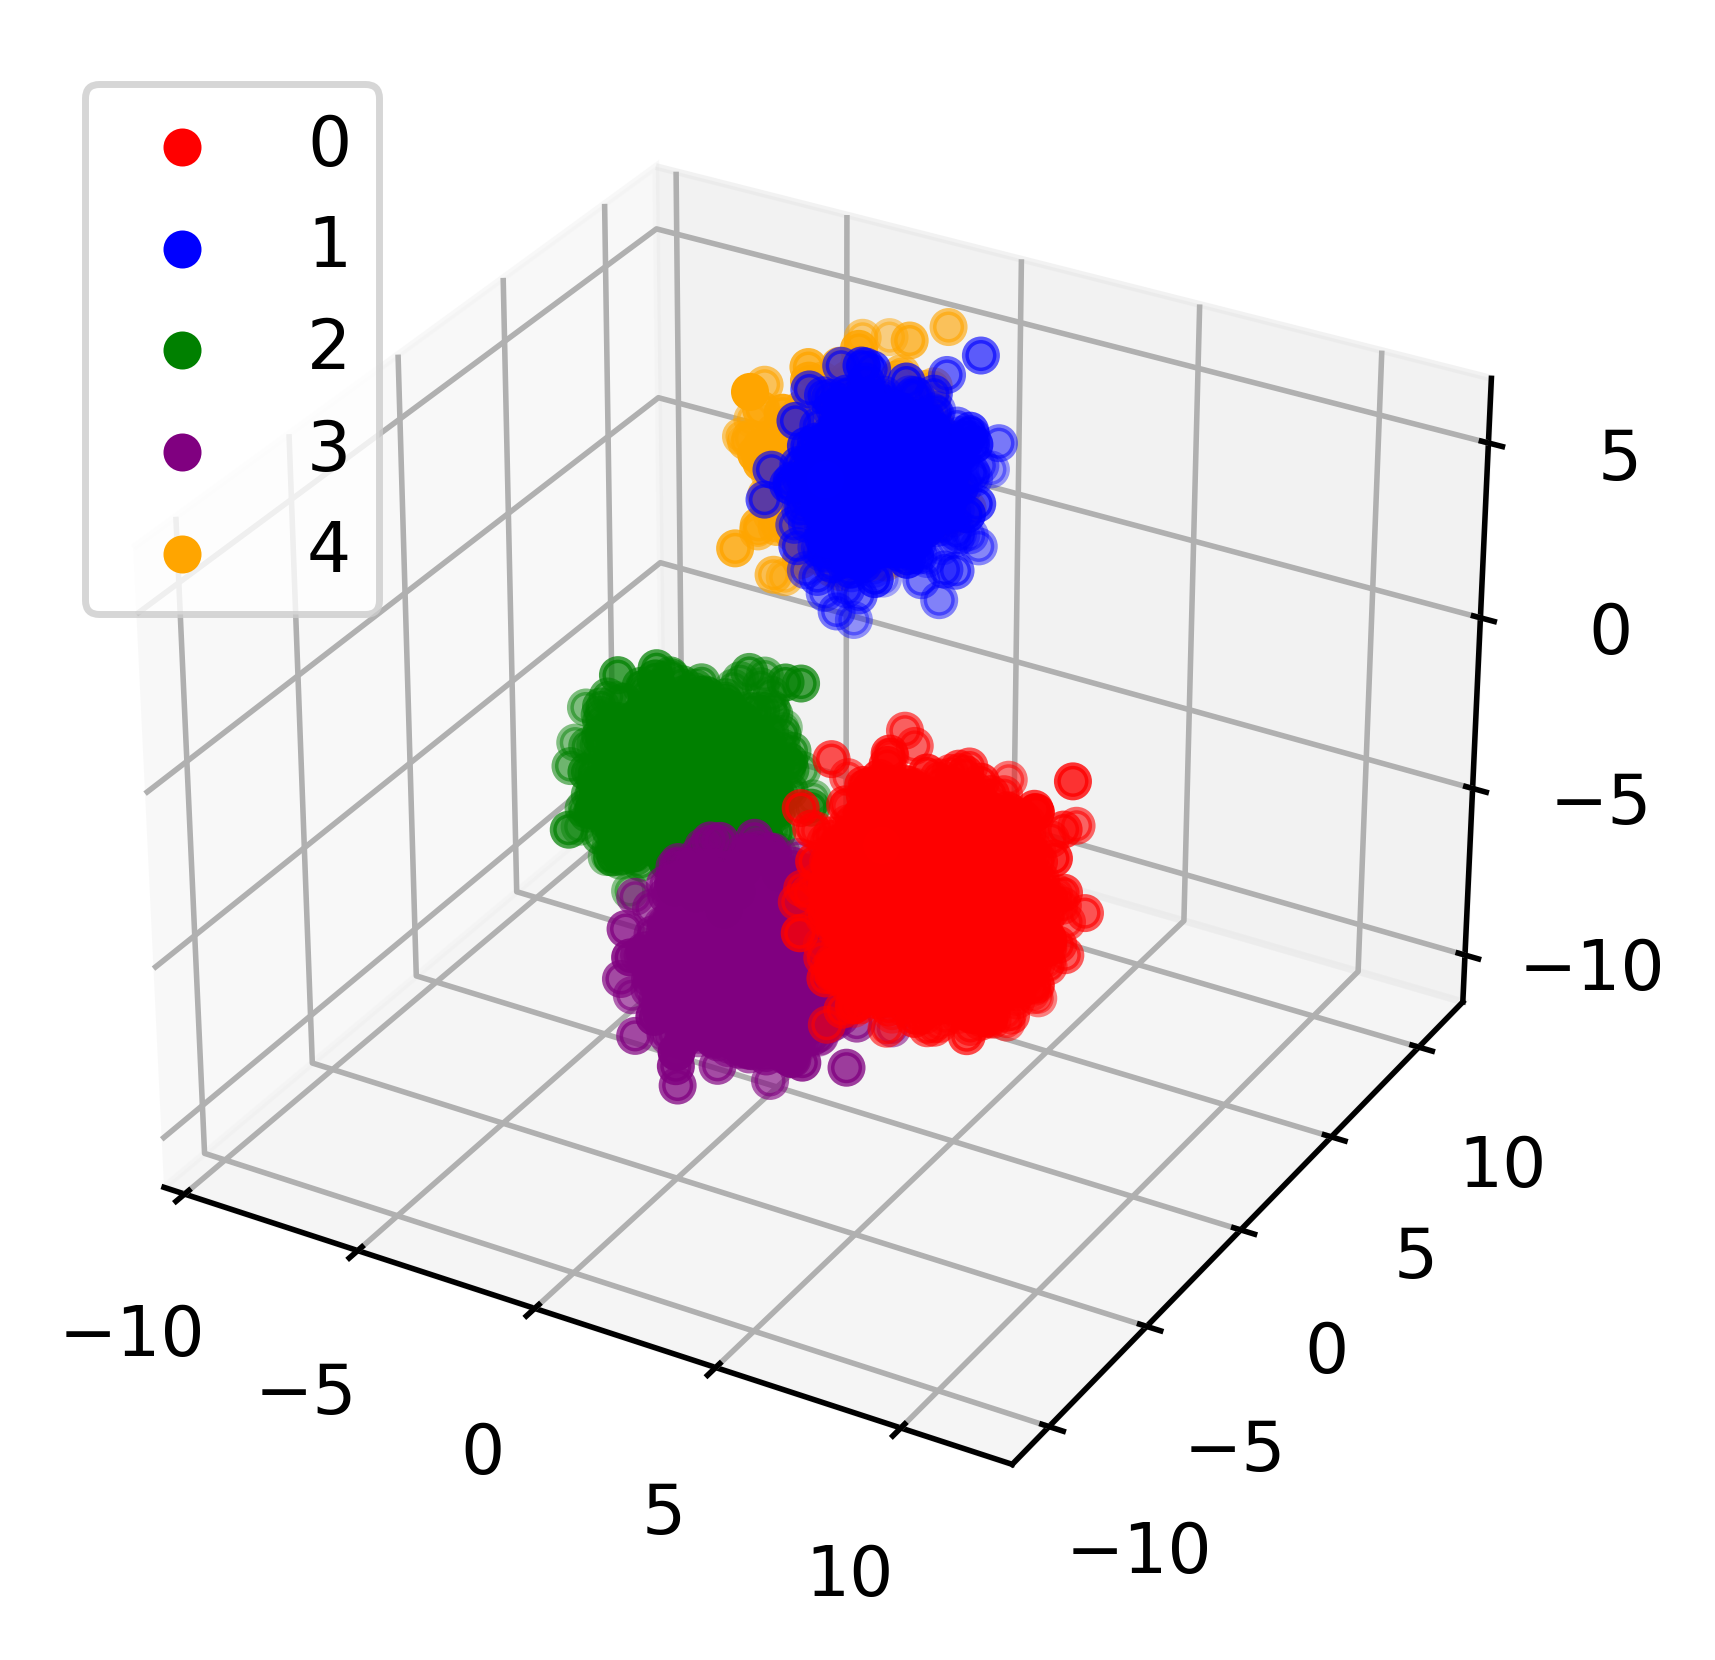

In [22]:
mu=np.array(mu)

# visualizing the given dataset based on the clusters that we created using k-means clustering algorithm
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

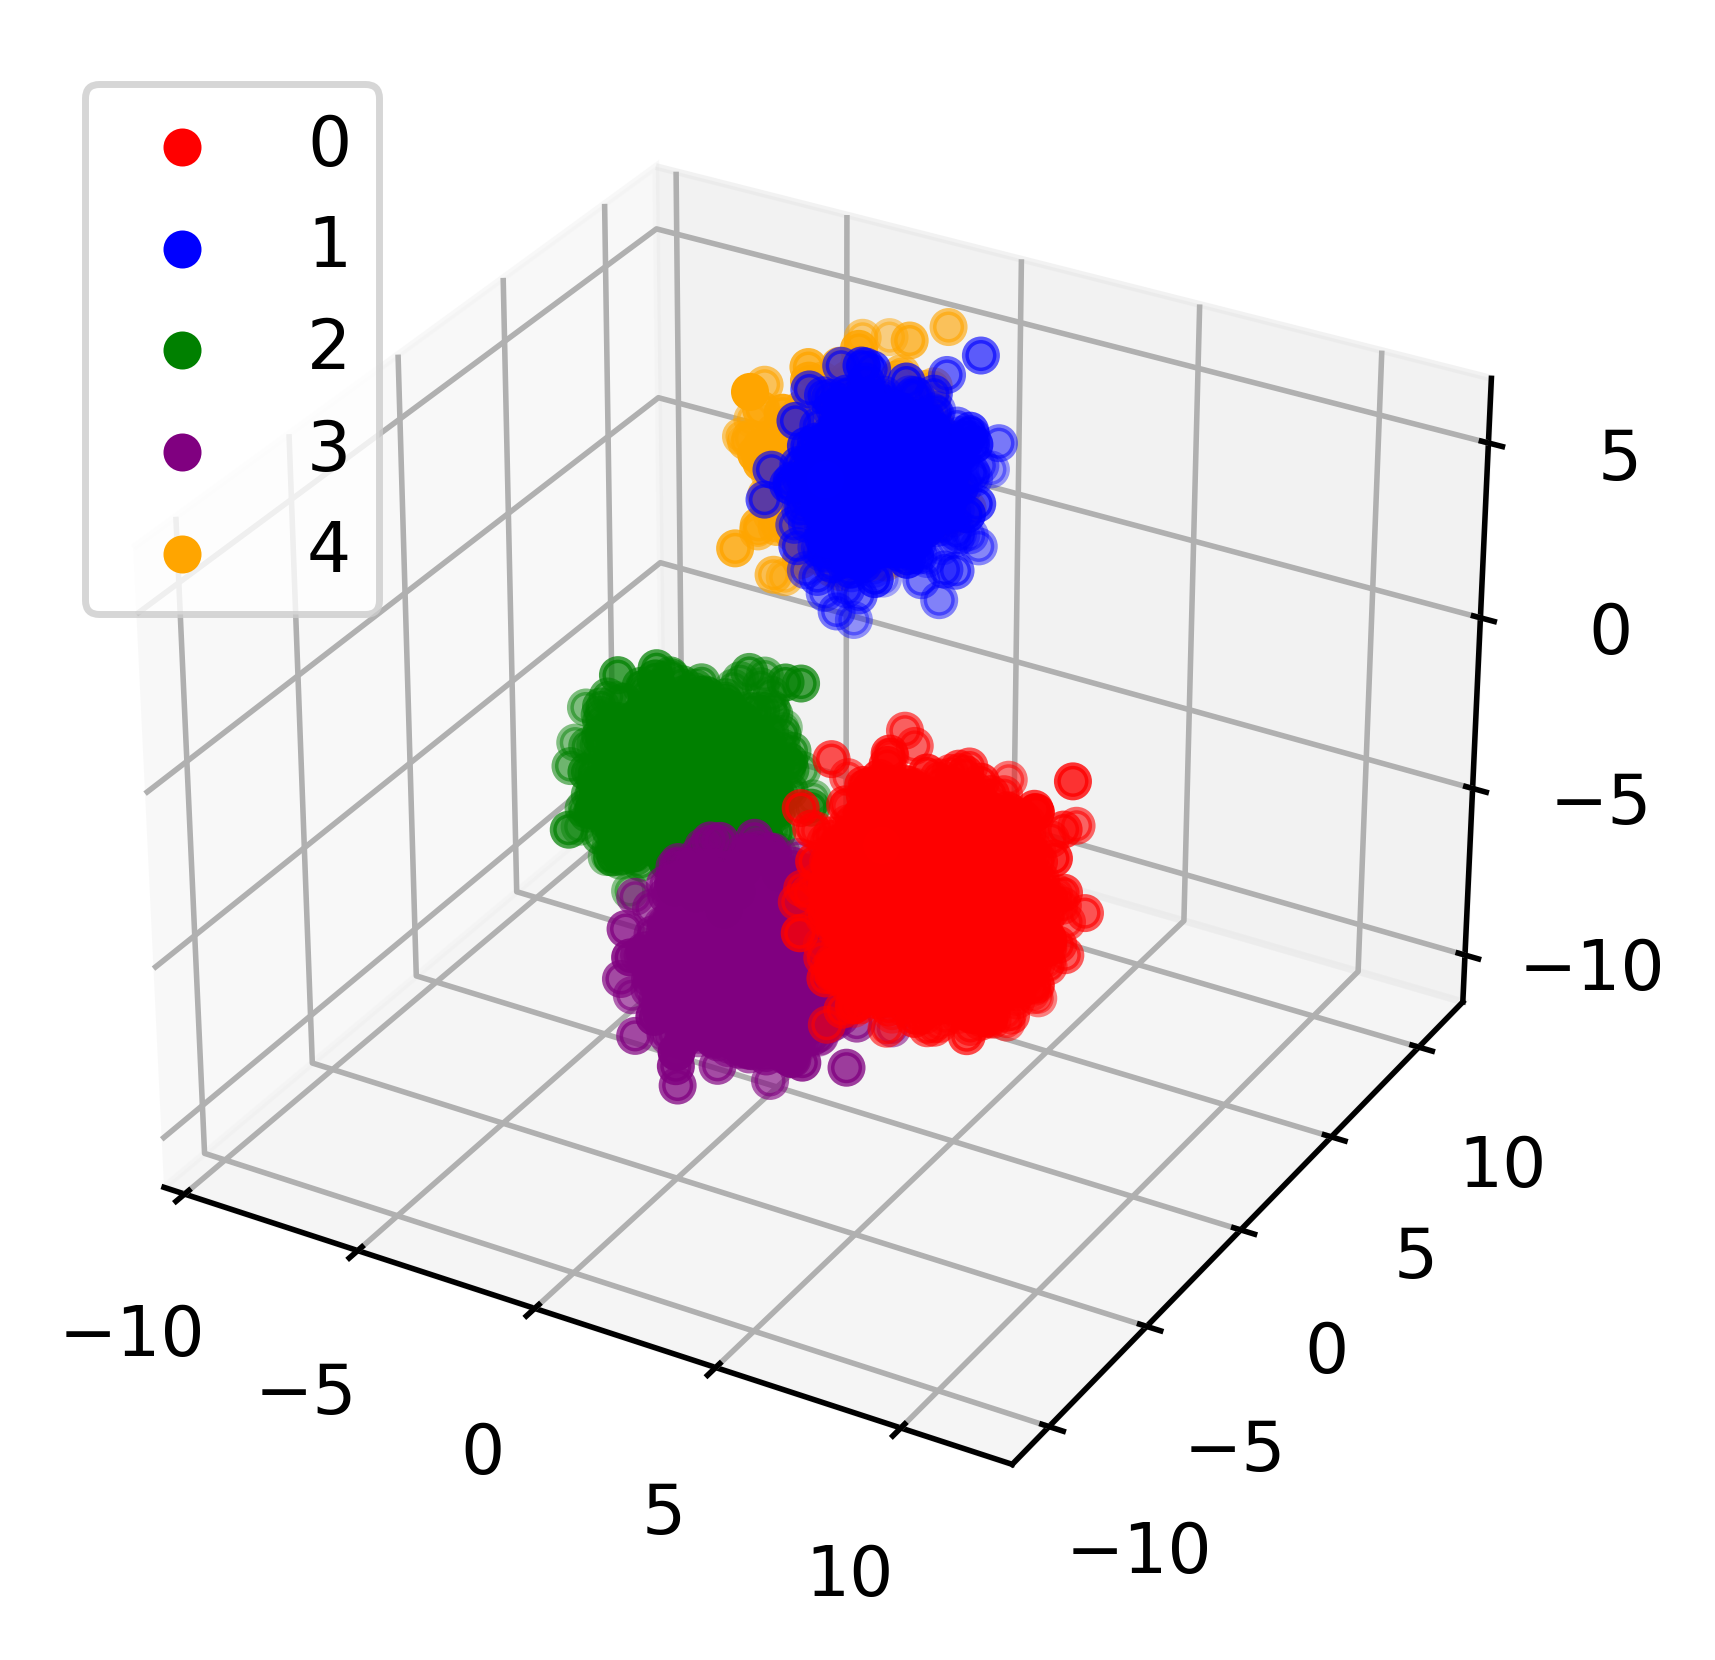

In [24]:
model = KMeans(n_clusters=k, init='random', random_state=42)   
y_predict = model.fit_predict(data[0])

y_pred=pd.DataFrame(y_predict)

mu=np.array(y_predict)

# Visualizing the  dataset based on the clusters that sklearn.KMeans created
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

In [ ]:
Same vectors' size --> compare the 3 algorithms (running 10 times each)